## BPR simple

In [1]:
#%load_ext watermark
%load_ext autoreload 
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import scipy as sp
from subprocess import call
from pybpr import *
import matplotlib.pyplot as plt

In [4]:
cf = cf_8user_10item 
cf.generate_train_test(user_test_ratio=0.2)

In [5]:
cf.R_train.toarray()

array([[1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]], dtype=int8)

In [23]:
bpr = BPR(
    num_features = 4,
    reg_lambda=0.0,
    learning_rate=0.2,
    num_iters = 50,
    batch_size=10,
    initial_std = 0.01,
    seed=None
)
bpr_ndcg_func = partial(
    cf.get_ndcg_metric,
    num_items=1
)
bpr.fit(cf.R_train, bpr_ndcg_func)
ndcg_df = pd.DataFrame(bpr.ndcg_metric)

setting batch size to 8


BPR:  12%|█████▉                                           | 6/50 [00:10<01:13,  1.67s/it]


KeyboardInterrupt: 

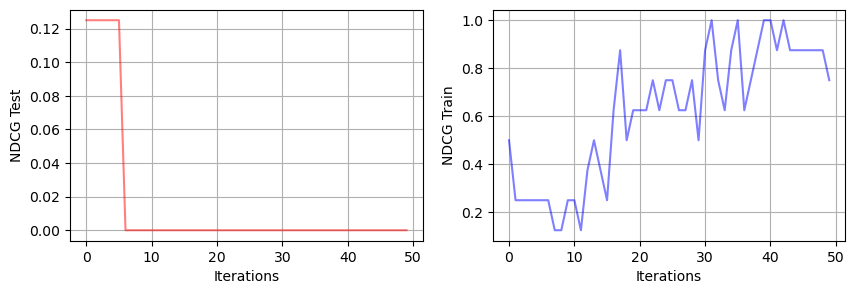

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(ndcg_df['test'], '-r', alpha=0.5)
ax[1].plot(ndcg_df['train'], '-b', alpha=0.5)
ax[0].set_ylabel('NDCG Test')
ax[1].set_ylabel('NDCG Train')
for iax in ax:
    iax.grid(True)
    #iax.set_xlim([0, len(ndcg)-1])
    iax.set_xlabel('Iterations')
#iax.set_xticks(np.arange(0,len(bpr.test_mse),5))

In [ ]:
np.around(bpr.item_mat,1)
#np.around(bpr.user_mat,2)

In [ ]:
cf.get_top_items_for_this_user(0, bpr.user_mat, bpr.item_mat, 2)

In [ ]:
cf.get_similar(bpr.user_mat, for_this_inds=0, count=3)